## Auxilary Functions

In [1]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False


def extract_model_size(model_name):
    if model_name.startswith("openai-community/gpt2"):
        return {
            "openai-community/gpt2": 0.124,
            "openai-community/gpt2-medium": 0.355,
            "openai-community/gpt2-large": 0.774,
            "openai-community/gpt2-xl": 1.5,
        }[model_name]
    for i in model_name.split("-"):
        if (i.lower().endswith("b") or i.lower().endswith("m")) and is_number(i[:-1]):
            if i.lower().endswith("b"):
                return float(i[:-1])
            elif i.lower().endswith("m"):
                return float(i[:-1]) / 1000.0
            else:
                return 0
    return 0

In [2]:
def task2metric(task_name):
    if task_name in ["cola", "mela_en"]:
        ret = "mcc,none"
    elif task_name in [
        "mnli",
        "qnli",
        "rte",
        "mrpc",
        "wnli",
        "qqp",
        "sst2",
        "boolq",
        "cb",
        "copa",
        "multirc",
        "sglue_rte",
        "wic",
        "wsc",
        "anli_r1",
        "commonsense_qa",
        "paws_en",
        "pubmedqa",
        "social_iqa",
        "winogrande",
    ]:
        ret = "acc,none"
    elif task_name in [
        "openbookqa",
        "hellaswag",
        "arc_easy",
        "arc_challenge",
        "medqa_4options",
        "headqa_en",
        "logiqa",
        "mathqa",
        "medmcqa",
        "piqa",
        "sciq",
        "swag",
    ]:
        ret = "acc_norm,none"
    elif task_name in [
        "drop",
        "record",
        "coqa",
    ]:
        ret = "em,none"
    elif task_name in [
        "babi",
        "webqs",
    ]:
        ret = "exact_match,none"
    elif task_name in [
        "qasper_bool",
    ]:
        ret = "f1,none"
    elif task_name in [
        "mutual",
    ]:
        ret = "r@1,none"
    elif task_name in [
        "nq_open",
        "triviaqa",
        "fld_default",
    ]:
        ret = "exact_match,remove_whitespace"
    elif task_name in ["gsm8k"]:
        ret = "exact_match,flexible-extract"
    elif task_name in [
        "wikitext",
        "pile_10k",
        "wiki_2025",
        "arxiv_2025",
        "stackexchange_2025",
    ]:
        ret = "bits_per_byte,none"
    else:
        raise NotImplementedError(f"Task {task_name} not implemented")
    ret = "test_" + ret
    return ret

In [3]:
task_size = {
    "gsm8k": 7473,
    "fld_default": 30000,
    "triviaqa": 138384,
    "nq_open": 87925,
    "webqs": 3778,
    "babi": 18013,
    "record": 100730,
    "coqa": 7199,
    "drop": 77409,
    "mutual": 7088,
    "qasper_bool": 409,
    "swag": 73546,
    "sciq": 11679,
    "piqa": 16113,
    "medmcqa": 182822,
    "mathqa": 29837,
    "logiqa": 7376,
    "headqa_en": 2657,
    "medqa_4options": 10178,
    "arc_challenge": 1119,
    "arc_easy": 2251,
    "hellaswag": 39905,
    "openbookqa": 4957,
    "winogrande": 40398,
    "social_iqa": 33410,
    "pubmedqa": 450,
    "paws_en": 49401,
    "commonsense_qa": 9741,
    "anli_r1": 16946,
    "wsc": 554,
    "wic": 5428,
    "sglue_rte": 2490,
    "multirc": 705,
    "copa": 400,
    "cb": 250,
    "boolq": 9427,
    "sst2": 67349,
    "qqp": 363846,
    "wnli": 635,
    "mrpc": 3668,
    "rte": 2490,
    "qnli": 104743,
    "mnli": 392702,
    "mela_en": 8551,
    "cola": 8551,
}

In [4]:
valid_tasks = [
    "mnli",
    "qqp",
    "medmcqa",
    "qnli",
    "nq_open",
    "sst2",
    "winogrande",
    "hellaswag",
    "social_iqa",
    "mathqa",
    "anli_r1",
    "piqa",
    "sciq",
    "commonsense_qa",
    "boolq",
    "cola",
    "gsm8k",
    "wic",
    "openbookqa",
    "mrpc",
    "headqa_en",
    "rte",
    "arc_easy",
    "arc_challenge",
]
pp_tasks = ["wiki_2025", "stackexchange_2025", "arxiv_2025"]

In [5]:
pt_models = [
    "01-ai/Yi-1.5-6B",
    "01-ai/Yi-1.5-9B",
    "01-ai/Yi-6B",
    "01-ai/Yi-9B",
    "EleutherAI/pythia-1.4b-deduped",
    "EleutherAI/pythia-12b",
    "EleutherAI/pythia-160m-deduped",
    "EleutherAI/pythia-1b-deduped",
    "EleutherAI/pythia-2.8b-deduped",
    "EleutherAI/pythia-410m-deduped",
    "EleutherAI/pythia-6.9b-deduped",
    "EleutherAI/pythia-70m-deduped",
    "Qwen/Qwen1.5-0.5B",
    "Qwen/Qwen1.5-1.8B",
    "Qwen/Qwen1.5-14B",
    "Qwen/Qwen1.5-4B",
    "Qwen/Qwen1.5-7B",
    "Qwen/Qwen2-0.5B",
    "Qwen/Qwen2-1.5B",
    "Qwen/Qwen2-7B",
    "Qwen/Qwen2.5-0.5B",
    "Qwen/Qwen2.5-1.5B",
    "Qwen/Qwen2.5-14B",
    "Qwen/Qwen2.5-3B",
    "Qwen/Qwen2.5-7B",
    "google/gemma-2-2b",
    "google/gemma-2-9b",
    "google/gemma-2b",
    "google/gemma-7b",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Meta-Llama-3-8B",
    "openai-community/gpt2",
    "openai-community/gpt2-large",
    "openai-community/gpt2-medium",
    "openai-community/gpt2-xl",
]
it_models = [
    "01-ai/Yi-1.5-6B-Chat",
    "01-ai/Yi-1.5-9B-Chat",
    "01-ai/Yi-6B-Chat",
    "Qwen/Qwen1.5-0.5B-Chat",
    "Qwen/Qwen1.5-1.8B-Chat",
    "Qwen/Qwen1.5-14B-Chat",
    "Qwen/Qwen1.5-4B-Chat",
    "Qwen/Qwen1.5-7B-Chat",
    "Qwen/Qwen2-0.5B-Instruct",
    "Qwen/Qwen2-1.5B-Instruct",
    "Qwen/Qwen2-7B-Instruct",
    "Qwen/Qwen2.5-0.5B-Instruct",
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct",
    "Qwen/Qwen2.5-3B-Instruct",
    "Qwen/Qwen2.5-7B-Instruct",
    "google/gemma-2-2b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2b-it",
    "google/gemma-7b-it",
    "meta-llama/Llama-3.1-8B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Meta-Llama-3-8B-Instruct",
]
model_list = pt_models + it_models

In [6]:
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt

# Enable LaTeX for text rendering
plt.rc("text", usetex=False)
# plt.rc("font", family="serif")  # Choose the font as needed

task_rename = {
    "mnli": r"\texttt{MNLI}",
    "qqp": r"\texttt{QQP}",
    "medmcqa": r"\texttt{MedMCQA}",
    "qnli": r"\texttt{QNLI}",
    "nq_open": r"\texttt{NQ-Open}",
    "sst2": r"\texttt{SST-2}",
    "winogrande": r"\texttt{Winogrande}",
    "hellaswag": r"\texttt{HellaSwag}",
    "social_iqa": r"\texttt{Social-IQA}",
    "mathqa": r"\texttt{MathQA}",
    "anli_r1": r"\texttt{ANLI}",
    "piqa": r"\texttt{PIQA}",
    "sciq": r"\texttt{SciQ}",
    "commonsense_qa": r"\texttt{CommonsenseQA}",
    "boolq": r"\texttt{BoolQ}",
    "cola": r"\texttt{CoLA}",
    "gsm8k": r"\texttt{GSM8K}",
    "wic": r"\texttt{WiC}",
    "openbookqa": r"\texttt{OpenBookQA}",
    "mrpc": r"\texttt{MRPC}",
    "headqa_en": r"\texttt{HeadQA}",
    "rte": r"\texttt{RTE}",
    "arc_easy": r"\texttt{ARC-Easy}",
    "arc_challenge": r"\texttt{ARC-Challenge}",
    "stackexchange_2025": r"\texttt{Stack}",
    "wiki_2025": r"\texttt{Wiki}",
    "arxiv_2025": r"\texttt{Arxiv}",
}
task_rename = {
    k: v.replace(r"\texttt{", "").replace("}", "") for k, v in task_rename.items()
}

model_rename = {
    "01-ai/Yi-1.5-6B": r"Yi-1.5-6B",
    "01-ai/Yi-1.5-6B-Chat": r"Yi-1.5-6B-IT",
    "01-ai/Yi-1.5-9B": r"Yi-1.5-9B",
    "01-ai/Yi-1.5-9B-Chat": r"Yi-1.5-9B-IT",
    "01-ai/Yi-6B": r"Yi-6B",
    "01-ai/Yi-6B-Chat": r"Yi-6B-IT",
    "01-ai/Yi-9B": r"Yi-9B",
    "EleutherAI/pythia-12b": r"Pythia-12B",
    "EleutherAI/pythia-6.9b-deduped": r"Pythia-6.9B",
    "EleutherAI/pythia-2.8b-deduped": r"Pythia-2.8B",
    "EleutherAI/pythia-1.4b-deduped": r"Pythia-1.4B",
    "EleutherAI/pythia-1b-deduped": r"Pythia-1B",
    "EleutherAI/pythia-410m-deduped": r"Pythia-410M",
    "EleutherAI/pythia-160m-deduped": r"Pythia-160M",
    "EleutherAI/pythia-70m-deduped": r"Pythia-70M",
    "Qwen/Qwen1.5-0.5B": r"Qwen1.5-0.5B",
    "Qwen/Qwen1.5-0.5B-Chat": r"Qwen1.5-0.5B-IT",
    "Qwen/Qwen1.5-1.8B": r"Qwen1.5-1.8B",
    "Qwen/Qwen1.5-1.8B-Chat": r"Qwen1.5-1.8B-IT",
    "Qwen/Qwen1.5-4B": r"Qwen1.5-4B",
    "Qwen/Qwen1.5-4B-Chat": r"Qwen1.5-4B-IT",
    "Qwen/Qwen1.5-7B": r"Qwen1.5-7B",
    "Qwen/Qwen1.5-7B-Chat": r"Qwen1.5-7B-IT",
    "Qwen/Qwen1.5-14B": r"Qwen1.5-14B",
    "Qwen/Qwen1.5-14B-Chat": r"Qwen1.5-14B-IT",
    "Qwen/Qwen2-0.5B": r"Qwen2-0.5B",
    "Qwen/Qwen2-0.5B-Instruct": r"Qwen2-0.5B-IT",
    "Qwen/Qwen2-1.5B": r"Qwen2-1.5B",
    "Qwen/Qwen2-1.5B-Instruct": r"Qwen2-1.5B-IT",
    "Qwen/Qwen2-7B": r"Qwen2-7B",
    "Qwen/Qwen2-7B-Instruct": r"Qwen2-7B-IT",
    "Qwen/Qwen2.5-0.5B": r"Qwen2.5-0.5B",
    "Qwen/Qwen2.5-0.5B-Instruct": r"Qwen2.5-0.5B-IT",
    "Qwen/Qwen2.5-1.5B": r"Qwen2.5-1.5B",
    "Qwen/Qwen2.5-1.5B-Instruct": r"Qwen2.5-1.5B-IT",
    "Qwen/Qwen2.5-3B": r"Qwen2.5-3B",
    "Qwen/Qwen2.5-3B-Instruct": r"Qwen2.5-3B-IT",
    "Qwen/Qwen2.5-7B": r"Qwen2.5-7B",
    "Qwen/Qwen2.5-7B-Instruct": r"Qwen2.5-7B-IT",
    "Qwen/Qwen2.5-14B": r"Qwen2.5-14B",
    "Qwen/Qwen2.5-14B-Instruct": r"Qwen2.5-14B-IT",
    "google/gemma-2-2b": r"Gemma-2-2B",
    "google/gemma-2-2b-it": r"Gemma-2-2B-IT",
    "google/gemma-2-9b": r"Gemma-2-9B",
    "google/gemma-2-9b-it": r"Gemma-2-9B-IT",
    "google/gemma-2b": r"Gemma-2B",
    "google/gemma-2b-it": r"Gemma-2B-IT",
    "google/gemma-7b": r"Gemma-7B",
    "google/gemma-7b-it": r"Gemma-7B-IT",
    "meta-llama/Llama-3.2-1B": r"Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct": r"Llama-3.2-1B-IT",
    "meta-llama/Llama-3.2-3B": r"Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct": r"Llama-3.2-3B-IT",
    "meta-llama/Llama-3.1-8B": r"Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct": r"Llama-3.1-8B-IT",
    "meta-llama/Meta-Llama-3-8B": r"Llama-3-8B",
    "meta-llama/Meta-Llama-3-8B-Instruct": r"Llama-3-8B-IT",
    "openai-community/gpt2": r"GPT2-124M",
    "openai-community/gpt2-large": r"GPT2-774M",
    "openai-community/gpt2-medium": r"GPT2-335M",
    "openai-community/gpt2-xl": r"GPT2-1.5B",
}


task_category = {
    "mnli": "Language Understanding",
    "qnli": "Language Understanding",
    "rte": "Language Understanding",
    "cola": "Language Understanding",
    "sst2": "Language Understanding",
    "mrpc": "Language Understanding",
    "qqp": "Language Understanding",
    "wic": "Language Understanding",
    "anli_r1": "Language Understanding",
    "winogrande": "Commonsense Reasoning",
    "commonsense_qa": "Commonsense Reasoning",
    "hellaswag": "Commonsense Reasoning",
    "social_iqa": "Commonsense Reasoning",
    "openbookqa": "Question Answering",
    "nq_open": "Question Answering",
    "boolq": "Question Answering",
    "arc_easy": "Question Answering",
    "arc_challenge": "Question Answering",
    "sciq": "Physics/Biology/Chemistry",
    "piqa": "Physics/Biology/Chemistry",
    "mathqa": "Math",
    "gsm8k": "Math",
    "medmcqa": "Medicine",
    "headqa_en": "Medicine",
}

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
import os

os.makedirs("figures", exist_ok=True)

## Dump and load

In [8]:
import json
import pandas as pd

all_results = json.loads(open("./all_results.json", "r").read())

all_train = all_results["train_before_test"]
for task_name in all_train.keys():
    all_train[task_name] = pd.Series(all_train[task_name])

all_eval = all_results["direct_eval"]
for task_name in all_eval.keys():
    all_eval[task_name] = pd.Series(all_eval[task_name])

all_train_err = all_results["train_before_test_stderr"]
for task_name in all_train_err.keys():
    all_train_err[task_name] = pd.Series(all_train_err[task_name])

all_eval_err = all_results["direct_eval_stderr"]
for task_name in all_eval_err.keys():
    all_eval_err[task_name] = pd.Series(all_eval_err[task_name])

## Compare Downstream Tasks

In [9]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

from scipy.stats import rankdata, kendalltau # type: ignore


def compare(task_a, task_b, task_a_err=None, task_b_err=None):
    allowed_models = set(task_a.index)
    allowed_models = allowed_models.intersection(set(task_b.index))
    allowed_models = list(allowed_models)
    if len(allowed_models) < 5:
        return None

    acc_a = (task_a.loc[allowed_models]).to_list()
    acc_b = (task_b.loc[allowed_models]).to_list()
    # stderr_a = (task_a_err.loc[allowed_models]).to_list()
    # stderr_b = (task_b_err.loc[allowed_models]).to_list()

    rank_a = rankdata(acc_a)
    rank_b = rankdata(acc_b)
    tau = kendalltau(rank_a, rank_b).statistic

    return tau, np.corrcoef(acc_a, acc_b)[0, 1]

### Direct evaluation

In [10]:
import pandas as pd

ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in valid_tasks:
    for task_name_b in valid_tasks:
        mtc_a = task2metric(task_name_a)
        mtc_b = task2metric(task_name_b)
        data_a = all_eval[task_name_a]
        data_b = all_eval[task_name_b]
        sgn_a = 1 if "test_bits_per_byte" in mtc_a else -1
        sgn_b = 1 if "test_bits_per_byte" in mtc_b else -1
        rank_diff = compare(
            sgn_a * data_a,
            sgn_b * data_b,
        )
        if rank_diff is None:
            continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


# print("Average & & %.3lf & %.3lf & %.3lf" % (d0 / cnt, d1 / cnt, d2 / cnt))
ret = pd.DataFrame(ret).round(3)
# display(ret)
display(
    ret[ret["task_a"] != ret["task_b"]][["kendall", "pearson"]].mean().round(3)
)

kendall    0.517
pearson    0.662
dtype: float64

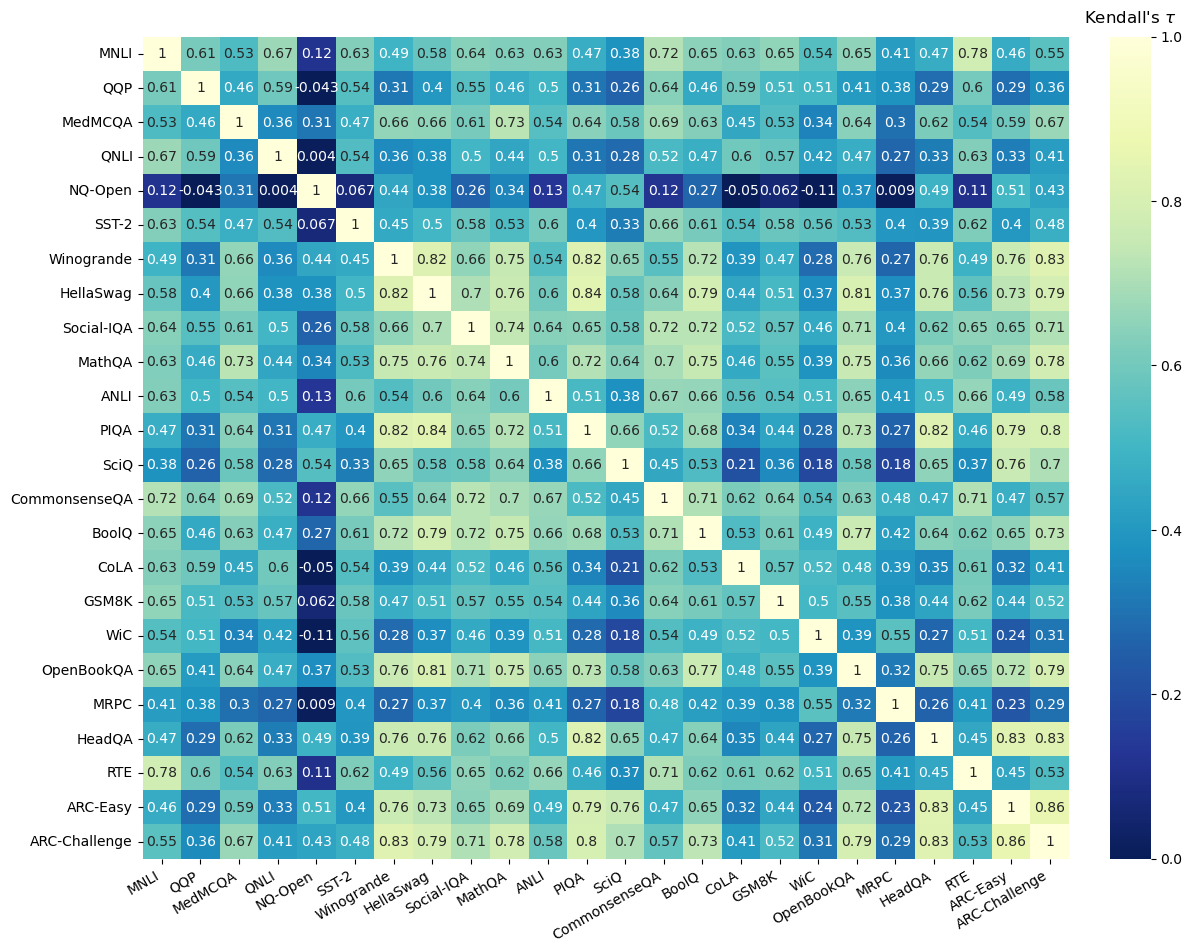

In [11]:
# Create a new figure
plt.figure(figsize=(len(valid_tasks) * 0.5, len(valid_tasks) * 0.4))

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=valid_tasks, columns=valid_tasks)

kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

ax = sns.heatmap(
    kendall_data,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.04, "shrink": 1.0},
)


cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall's $\\tau$", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")

plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout

plt.savefig(
    "figures/direct_model_eval_full_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

In [12]:
eval_ret = ret.copy()

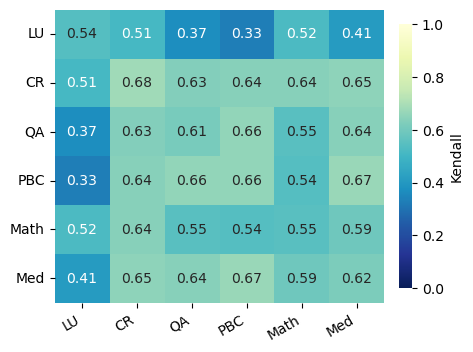

In [13]:
from collections import defaultdict

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=valid_tasks, columns=valid_tasks)

category_to_tasks = defaultdict(list)
for task in valid_tasks:
    category = task_category.get(task, None)
    category_to_tasks[category].append(task)

categories = [
    "Language Understanding",
    "Commonsense Reasoning",
    "Question Answering",
    "Physics/Biology/Chemistry",
    "Math",
    "Medicine",
]
category_matrix = pd.DataFrame(index=categories, columns=categories, dtype=float)

for cat1 in categories:
    for cat2 in categories:
        tasks1 = category_to_tasks[cat1]
        tasks2 = category_to_tasks[cat2]

        # Avoid duplicate comparisons for self-pairs
        if cat1 == cat2:
            pairs = [
                (a, b)
                for i, a in enumerate(tasks1)
                for j, b in enumerate(tasks2)
                if i < j
            ]
        else:
            pairs = [(a, b) for a in tasks1 for b in tasks2]

        values = []
        for a, b in pairs:
            try:
                val = kendall_data.loc[a][b]
            except KeyError:
                val = kendall_data.loc[b][a]
            if not pd.isna(val):
                values.append(val)

        category_matrix.loc[cat1, cat2] = np.mean(values) if values else np.nan


catetgory_short_name = {
    "Language Understanding": "LU",
    "Commonsense Reasoning": "CR",
    "Question Answering": "QA",
    "Physics/Biology/Chemistry": "PBC",
    "Math": "Math",
    "Medicine": "Med",
}
category_matrix.rename(index=catetgory_short_name, inplace=True)
category_matrix.rename(columns=catetgory_short_name, inplace=True)

plt.figure(figsize=(len(categories) * 0.8, len(categories) * 0.6))

ax = sns.heatmap(
    category_matrix.round(2),
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "Kendall", "fraction": 0.046, "pad": 0.04, "shrink": 0.9},
)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout(pad=1.0)

plt.savefig(
    "figures/direct_model_eval_category_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

### Train-before-test

In [14]:
import pandas as pd

ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in valid_tasks:
    for task_name_b in valid_tasks:
        # if task_name_a == task_name_b:
        #     continue
        mtc_a = task2metric(task_name_a)
        mtc_b = task2metric(task_name_b)
        data_a = all_train[task_name_a].copy()
        data_b = all_train[task_name_b].copy()
        if "test_bits_per_byte" in mtc_a:
            sgn_a = -1
        else:
            sgn_a = 1
        if "test_bits_per_byte" in mtc_b:
            sgn_b = -1
        else:
            sgn_b = 1

        rank_diff = compare(data_a * sgn_a, data_b * sgn_b)
        if rank_diff is None:
            continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
display(ret[ret["task_a"] != ret["task_b"]][["kendall", "pearson"]].mean().round(3))

kendall    0.755
pearson    0.855
dtype: float64

In [15]:
train_ret = ret.copy()

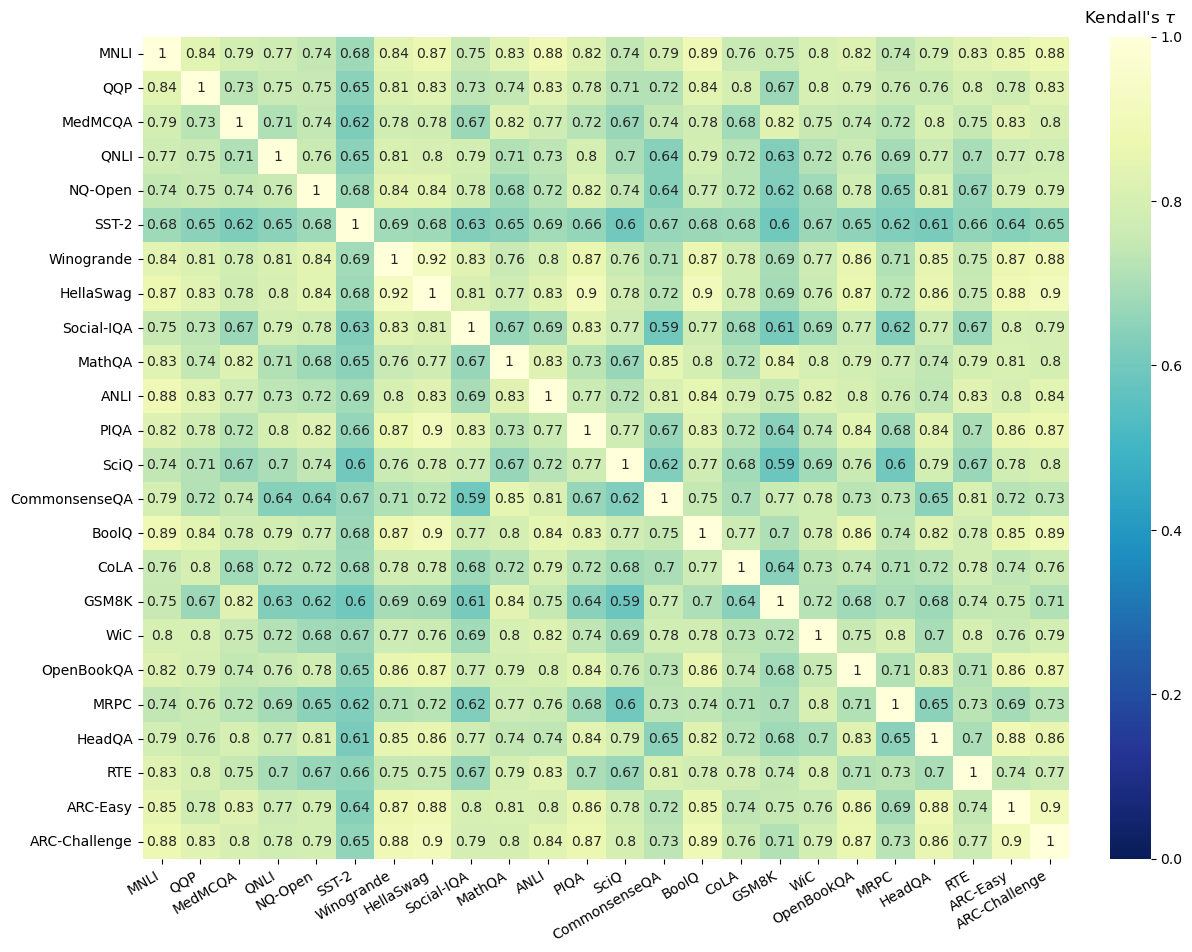

In [16]:
# Create a new figure
plt.figure(figsize=(len(valid_tasks) * 0.5, len(valid_tasks) * 0.4))

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=valid_tasks, columns=valid_tasks)

kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

# Plot the heatmap
ax = sns.heatmap(
    kendall_data,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.04, "shrink": 1.0},
)

cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall's $\\tau$", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")

plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout

plt.savefig(
    "figures/train_before_test_full_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

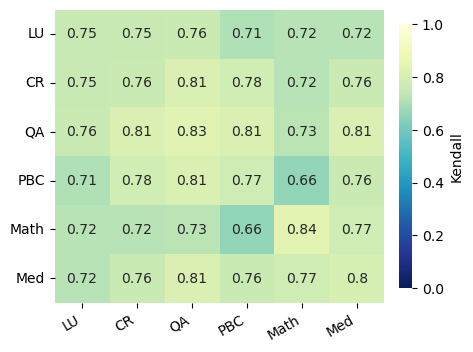

In [17]:
from collections import defaultdict


kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=valid_tasks, columns=valid_tasks)

category_to_tasks = defaultdict(list)
for task in valid_tasks:
    category = task_category.get(task, "Other")
    category_to_tasks[category].append(task)

categories = [
    "Language Understanding",
    "Commonsense Reasoning",
    "Question Answering",
    "Physics/Biology/Chemistry",
    "Math",
    "Medicine",
]
category_matrix = pd.DataFrame(index=categories, columns=categories, dtype=float)

for cat1 in categories:
    for cat2 in categories:
        tasks1 = category_to_tasks[cat1]
        tasks2 = category_to_tasks[cat2]

        # Avoid duplicate comparisons for self-pairs
        if cat1 == cat2:
            pairs = [
                (a, b)
                for i, a in enumerate(tasks1)
                for j, b in enumerate(tasks2)
                if i < j
            ]
        else:
            pairs = [(a, b) for a in tasks1 for b in tasks2]

        values = []
        for a, b in pairs:
            try:
                val = kendall_data.loc[a][b]
            except KeyError:
                val = kendall_data.loc[b][a]
            if not pd.isna(val):
                values.append(val)

        category_matrix.loc[cat1, cat2] = np.mean(values) if values else np.nan

catetgory_short_name = {
    "Language Understanding": "LU",
    "Commonsense Reasoning": "CR",
    "Question Answering": "QA",
    "Physics/Biology/Chemistry": "PBC",
    "Math": "Math",
    "Medicine": "Med",
}
category_matrix.rename(index=catetgory_short_name, inplace=True)
category_matrix.rename(columns=catetgory_short_name, inplace=True)

plt.figure(figsize=(len(categories) * 0.8, len(categories) * 0.6))

ax = sns.heatmap(
    category_matrix.round(2),
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "Kendall", "fraction": 0.046, "pad": 0.04, "shrink": 0.9},
)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout(pad=1.0)

plt.savefig(
    "figures/train_before_test_category_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

### Combined figure:

In [18]:
eval_kendall_data = eval_ret.pivot(index="task_a", columns="task_b", values="kendall")
eval_kendall = eval_kendall_data.reindex(index=valid_tasks, columns=valid_tasks)
train_kendall_data = train_ret.pivot(index="task_a", columns="task_b", values="kendall")
train_kendall = train_kendall_data.reindex(index=valid_tasks, columns=valid_tasks)

0.755
0.517
0.238


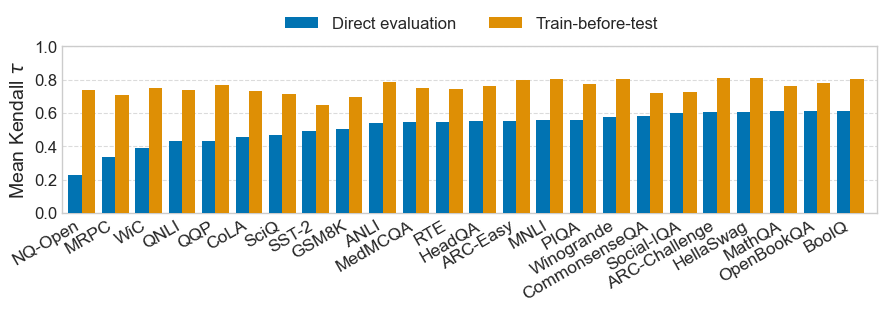

In [19]:
import seaborn as sns # type: ignore


plt.style.use("seaborn-v0_8-whitegrid")  # Clean grid, lighter background
palette = sns.color_palette("colorblind")


def compute_row_mean(kendall_data):
    results = {}
    for task in kendall_data.index:
        # get all values in the row, except the diagonal
        row = kendall_data.loc[task]
        row = row[row.index != task]
        # compute the mean
        mean = row.mean()
        results[task] = mean
    return results


mean_train = compute_row_mean(train_kendall)
mean_eval = compute_row_mean(eval_kendall)

assert len(mean_train) == len(mean_eval)

# bar plot, where the x axis is the task name, and the y axis is the mean, and two bars for train and eval
plt.figure(figsize=(9, 3.5))

# sort tasks by mean_eval
sorted_tasks = sorted(mean_eval.keys(), key=lambda x: mean_eval[x])
mean_train = {k: mean_train[k] for k in sorted_tasks}
mean_eval = {k: mean_eval[k] for k in sorted_tasks}

x = np.arange(len(mean_train))
width = 0.4
plt.bar(
    x,
    mean_eval.values(),
    label="Direct evaluation",
    width=width,
    zorder=10,
    color=palette[0],
)
plt.bar(
    x + width,
    mean_train.values(),
    label="Train-before-test",
    width=width,
    zorder=10,
    color=palette[1],
)

tick_legends = [task_rename.get(i, i) for i in mean_train.keys()]
plt.xticks(x + width / 2, tick_legends, rotation=30, ha="right", fontsize=12.5)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
# no box for the legend

plt.ylabel("Mean Kendall $\\tau$", fontsize=14)

# y lim between 0 and 1
plt.ylim(0, 1)
plt.xlim(-width, len(mean_train))
# grid on, only y, on the background
plt.grid(True, axis="y", linestyle="--", alpha=0.7, zorder=-10)
plt.grid(False, axis="x")

# legend OUTSIDE the plot, on the top right
plt.legend(
    ncols=2, frameon=False, fontsize=12, loc="upper right", bbox_to_anchor=(0.75, 1.27)
)
# plt.title(
#     "Mean Kendall $\\tau$ rank correlation between each benchmark and all others",
#     fontsize=14,
#     y=1.25,
# )

# tight layout
plt.tight_layout()

# # save as pdf
plt.savefig(
    "./figures/cross_down_mean_kendall_large.pdf",
    bbox_inches="tight",
)

print("%.3lf" % np.mean(list(mean_train.values())))
print("%.3lf" % np.mean(list(mean_eval.values())))
print(
    "%.3lf" % (np.mean(list(mean_train.values())) - np.mean(list(mean_eval.values())))
)

In [20]:
mean_train["nq_open"], mean_eval["nq_open"]

(0.7391304347826086, 0.22708695652173908)

In [21]:
print(
    "Ratio of task pairs with kendall train > eval: %.3lf"
    % (
        len(train_ret[train_ret["kendall"] - eval_ret["kendall"] > 0])
        / (len(train_ret) - len(valid_tasks))
    )
)

Ratio of task pairs with kendall train > eval: 0.993


## Compare Perplexity with Downstream

### Direct evaluation

In [22]:
import pandas as pd

ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in pp_tasks:
    for task_name_b in pp_tasks + valid_tasks:
        data_a = all_eval[task_name_a].copy()
        if task_name_b in pp_tasks:
            data_b = all_eval[task_name_b].copy()
        elif task_name_b in valid_tasks:
            data_b = -all_eval[task_name_b].copy()
        else:
            raise NotImplementedError

        rank_diff = compare(data_a, data_b)
        if rank_diff is None:
            continue
        # if task_name_b in pp_tasks:
        #     continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
display(
    ret[(ret["task_a"] != ret["task_b"]) & (ret["task_b"].isin(valid_tasks))][
        ["kendall", "pearson"]
    ]
    .mean()
    .round(3)
)

kendall    0.477
pearson    0.634
dtype: float64

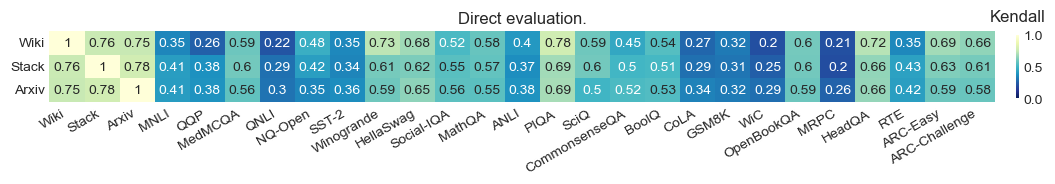

In [23]:
plt.figure(
    figsize=((len(pp_tasks) + len(valid_tasks)) * 0.5 * 0.8, len(pp_tasks) * 0.7 * 0.9)
)

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=pp_tasks, columns=pp_tasks + valid_tasks)
kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

# Mask for upper triangle
mask = np.triu(np.ones_like(kendall_data, dtype=bool))

ax = sns.heatmap(
    kendall_data,
    # mask=mask,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.02, "shrink": 0.9},
)

cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout

plt.title("Direct evaluation.")
plt.show()

### Train-before-Test

In [24]:
import pandas as pd

ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in pp_tasks:
    for task_name_b in pp_tasks + valid_tasks:
        data_a = all_train[task_name_a].copy()
        if task_name_b in pp_tasks:
            data_b = all_train[task_name_b].copy()
        elif task_name_b in valid_tasks:
            data_b = -all_train[task_name_b].copy()
        else:
            raise NotImplementedError

        rank_diff = compare(data_a, data_b)

        if rank_diff is None:
            continue
        # if task_name_b in pp_tasks:
        #     continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
# display(ret)
display(
    ret[(ret["task_a"] != ret["task_b"]) & (ret["task_b"].isin(valid_tasks))][
        ["kendall", "pearson"]
    ]
    .mean()
    .round(3)
)

kendall    0.740
pearson    0.874
dtype: float64

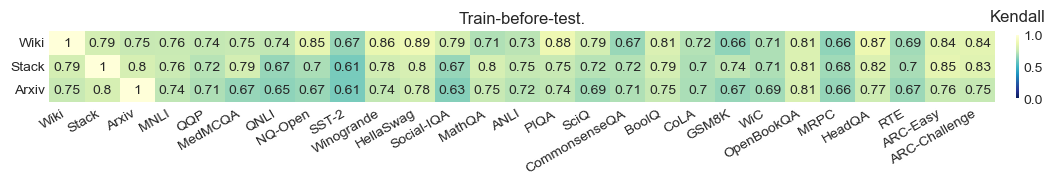

In [25]:
plt.figure(figsize=((len(pp_tasks) + len(valid_tasks)) * 0.5 * 0.8, len(pp_tasks) * 0.7 * 0.9))

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=pp_tasks, columns=pp_tasks + valid_tasks)
kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

# Mask for upper triangle
mask = np.triu(np.ones_like(kendall_data, dtype=bool))

ax = sns.heatmap(
    kendall_data,
    # mask=mask,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.02, "shrink": 0.9},
)

cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(rotation=0)

plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout

plt.title("Train-before-test.")
plt.savefig(
    "figures/pp_train_before_test_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

### Direct PP vs Train PP

In [26]:
import pandas as pd

ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name in pp_tasks:
    data_a = all_eval[task_name].copy()
    data_b = all_train[task_name].copy()

    # eval_b = all_eval[task_name]
    # for m in data_b.index:
    #     if m in eval_b.index:
    #         data_b.loc[m] = min(data_b.loc[m], eval_b.loc[m])
    rank_diff = compare(data_a, data_b)

    if rank_diff is None:
        continue
    ret["task_a"].append(task_name + "_eval")
    ret["task_b"].append(task_name + "_train")
    ret["kendall"].append(rank_diff[0])
    ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
display(ret)

,task_a,task_b,kendall,pearson
0,wiki_2025_eval,wiki_2025_train,0.830,0.952
1,stackexchange_2025_eval,stackexchange_2025_train,0.794,0.959
2,arxiv_2025_eval,arxiv_2025_train,0.775,0.953


### Direct PP *vs* Train downstream

Base models:

In [27]:
import pandas as pd

mm = [m for m in pt_models if "gemma" not in m.lower()]
ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in pp_tasks:
    for task_name_b in valid_tasks:
        data_a = all_eval[task_name_a].copy()
        data_b = -all_train[task_name_b].copy()

        rank_diff = compare(data_a.loc[mm], data_b.loc[mm])

        if rank_diff is None:
            continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
# display(ret)
display(ret[ret["task_a"] != ret["task_b"]][["kendall", "pearson"]].mean().round(3))

kendall    0.778
pearson    0.877
dtype: float64

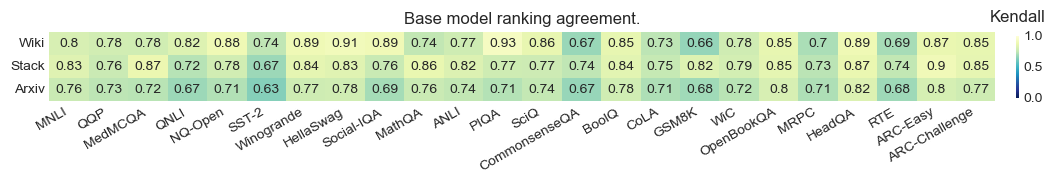

In [28]:
plt.figure(
    figsize=((len(pp_tasks) + len(valid_tasks)) * 0.5 * 0.8, len(pp_tasks) * 0.7 * 0.9)
)

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=pp_tasks, columns=valid_tasks)
kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

# Mask for upper triangle
mask = np.triu(np.ones_like(kendall_data, dtype=bool))

ax = sns.heatmap(
    kendall_data,
    # mask=mask,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.02, "shrink": 0.9},
)

cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

plt.title("Base model ranking agreement.")
plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout
plt.savefig(
    "figures/pp_dme_down_tbt_pt_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)

plt.show()

IT models:

In [29]:
import pandas as pd

mm = [m for m in it_models if "gemma" not in m.lower()]
ret = {"task_a": [], "task_b": [], "kendall": [], "pearson": []}
for task_name_a in pp_tasks:
    for task_name_b in valid_tasks:
        data_a = all_eval[task_name_a].copy()
        data_b = -all_train[task_name_b].copy()

        rank_diff = compare(data_a.loc[mm], data_b.loc[mm])

        if rank_diff is None:
            continue
        ret["task_a"].append(task_name_a)
        ret["task_b"].append(task_name_b)
        ret["kendall"].append(rank_diff[0])
        ret["pearson"].append(rank_diff[1])


ret = pd.DataFrame(ret).round(3)
# display(ret)
display(ret[ret["task_a"] != ret["task_b"]][["kendall", "pearson"]].mean().round(3))

kendall    0.505
pearson    0.716
dtype: float64

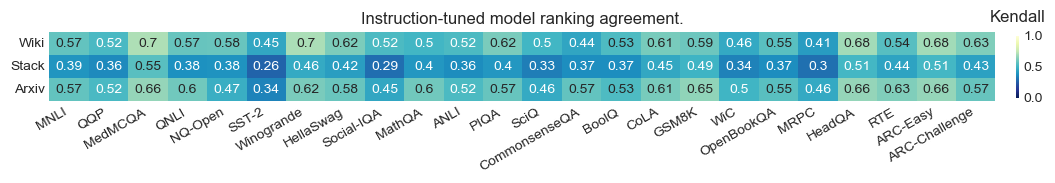

In [30]:
plt.figure(figsize=((len(pp_tasks) + len(valid_tasks)) * 0.5 * 0.8, len(pp_tasks) * 0.7 * 0.9))

kendall_data = ret.pivot(index="task_a", columns="task_b", values="kendall")
kendall_data = kendall_data.reindex(index=pp_tasks, columns=valid_tasks)
kendall_data.index = [task_rename.get(i, i) for i in kendall_data.index]
kendall_data.columns = [task_rename.get(i, i) for i in kendall_data.columns]

# Mask for upper triangle
mask = np.triu(np.ones_like(kendall_data, dtype=bool))

ax = sns.heatmap(
    kendall_data,
    # mask=mask,
    annot=True,
    cmap="YlGnBu_r",
    vmin=0,
    vmax=1.0,
    cbar_kws={"label": "", "fraction": 0.046, "pad": 0.02, "shrink": 0.9},
)

cbar = ax.collections[0].colorbar
cbar.ax.set_title("Kendall", pad=10)

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

plt.title("Instruction-tuned model ranking agreement.")
plt.tight_layout(pad=1.0)  # Adjust padding for tighter layout
plt.savefig(
    "figures/pp_dme_down_tbt_it_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)

plt.show()

## PCA

### Direct-Eval

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
ret = []
for task_name in valid_tasks:
    mtc = task2metric(task_name)
    val = all_eval[task_name].loc[model_list].values.reshape(-1, 1)
    ret.append(val)

ret = np.concatenate(ret, axis=1)

pca = PCA(n_components=5)
X = StandardScaler().fit_transform(ret)
X_pca = pca.fit_transform(X)

# output the variance of each component
explained_variance = pca.explained_variance_ratio_
explained_variance, explained_variance.sum()

(array([0.69584915, 0.12618597, 0.0371142 , 0.03035488, 0.02375368]),
 0.9132578771070529)

In [33]:
pc1_eval = pd.Series(X_pca[:, 0].copy(), index=[m for m in model_list]).sort_values(ascending=False)
pc2_eval = pd.Series(X_pca[:, 1].copy(), index=[m for m in model_list]).sort_values(ascending=False)
pc3_eval = pd.Series(X_pca[:, 2].copy(), index=[m for m in model_list]).sort_values(ascending=False)

In [34]:
if pca.components_[0][0] < 0:
    pc1_eval = -pc1_eval

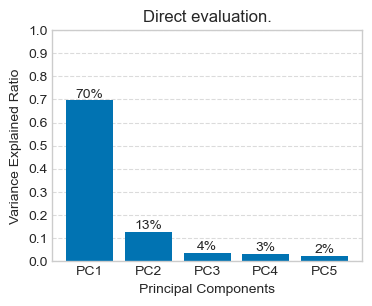

In [35]:
import numpy as np
import matplotlib.pyplot as plt

palette = sns.color_palette("colorblind", 10)
plt.figure(figsize=(4, 3))
bars = plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    align="center",
    color=palette[0],
)

plt.xlabel("Principal Components")
plt.ylabel("Variance Explained Ratio")
plt.ylim(0, 1)

# Create labels ["PC1", "PC2", ...]
pc_labels = [f"PC{i}" for i in range(1, len(explained_variance) + 1)]
plt.xticks(range(1, len(explained_variance) + 1), pc_labels)

plt.yticks(
    np.arange(0, 1.1, 0.1),
    [f"{i:.1f}" for i in np.arange(0, 1.1, 0.1)],
)
# plt.set_ylim(0, 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.7, zorder=-10)
plt.grid(False, axis="x")

# Adding text annotations above each bar
for bar, var in zip(bars, explained_variance):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        "%.0lf%%" % (100.0 * var),
        # "%.2lf" % (var),
        ha="center",
        va="bottom",
    )
plt.title("Direct evaluation.")

plt.savefig(
    "figures/direct_model_eval_pca_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

# Display the major components
# display(pca.components_)

### Train-before-Test

In [36]:
ret = []
for task_name in valid_tasks:
    mtc = task2metric(task_name)
    val = all_train[task_name].loc[model_list].values.reshape(-1, 1)
    ret.append(val)

ret = np.concatenate(ret, axis=1)

pca = PCA(n_components=5)
X = StandardScaler().fit_transform(ret)
X_pca = pca.fit_transform(X)

# output the variance of each component
explained_variance = pca.explained_variance_ratio_
explained_variance, explained_variance.sum()

(array([0.86359425, 0.0669933 , 0.02393855, 0.01183042, 0.00739468]),
 0.9737511968289518)

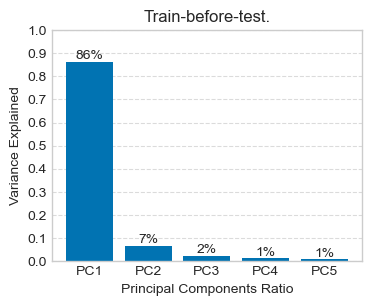

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming explained_variance and pca are defined
# explained_variance = <your explained variance data>
# pca = <your PCA model>

plt.figure(figsize=(4, 3))
bars = plt.bar(
    range(1, len(explained_variance) + 1), explained_variance, align="center", color=palette[0]
)

plt.xlabel("Principal Components Ratio")
plt.ylabel("Variance Explained")
plt.ylim(0, 1)

# Create labels ["PC1", "PC2", ...]
pc_labels = [f"PC{i}" for i in range(1, len(explained_variance) + 1)]
plt.xticks(range(1, len(explained_variance) + 1), pc_labels)

plt.yticks(
    np.arange(0, 1.1, 0.1),
    [f"{i:.1f}" for i in np.arange(0, 1.1, 0.1)],
)
plt.grid(True, axis="y", linestyle="--", alpha=0.7, zorder=-10)
plt.grid(False, axis="x")

# Adding text annotations above each bar
for bar, var in zip(bars, explained_variance):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        "%.0lf%%" % (100.0 * var),
        # "%.2lf" % (var),
        ha="center",
        va="bottom",
    )

plt.title("Train-before-test.")
plt.savefig(
    "figures/train_before_test_pca_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

# Display the major components
# display(pca.components_)

In [38]:
pc1 = pd.Series(X_pca[:, 0].copy(), index=[m for m in model_list]).sort_values(ascending=False)
pc2 = pd.Series(X_pca[:, 1].copy(), index=[m for m in model_list]).sort_values(ascending=False)
pc3 = pd.Series(X_pca[:, 2].copy(), index=[m for m in model_list]).sort_values(ascending=False)

In [39]:
if pca.components_[0][0] < 0:
    pc1 = -pc1

### PC1 vs Scale

In [40]:
palette = sns.color_palette("colorblind", 6)
family2color = {
    f: palette[(i + 1) % 6]
    for i, f in enumerate(
        ["openai-community", "meta-llama", "google", "Qwen", "EleutherAI", "01-ai"]
    )
}

In [41]:
model2compute = {
    "meta-llama/Meta-Llama-3-8B": {"N": 8.03, "D": 15000},
    "meta-llama/Meta-Llama-3-8B-Instruct": {"N": 8.03, "D": 15000},
    "meta-llama/Llama-3.1-8B": {"N": 8.03, "D": 15000},
    "meta-llama/Llama-3.1-8B-Instruct": {"N": 8.03, "D": 15000},
    # "meta-llama/Llama-3.2-1B": {"N": 1.24, "D": 9000},  # not sure here
    # "meta-llama/Llama-3.2-1B-Instruct": {"N": 1.24, "D": 9000},  # not sure here
    "meta-llama/Llama-3.2-3B": {"N": 3.21, "D": 9000},
    "meta-llama/Llama-3.2-3B-Instruct": {"N": 3.21, "D": 9000},
    # qwen1.5: https://github.com/QwenLM/Qwen3/issues/97#issuecomment-2689979000
    "Qwen/Qwen1.5-0.5B": {"N": 0.62, "D": 2400},
    "Qwen/Qwen1.5-1.8B": {"N": 1.84, "D": 2400},
    "Qwen/Qwen1.5-4B": {"N": 3.95, "D": 2400},
    "Qwen/Qwen1.5-7B": {"N": 7.72, "D": 4000},
    "Qwen/Qwen1.5-14B": {"N": 14.2, "D": 4000},
    "Qwen/Qwen1.5-0.5B-Chat": {"N": 0.62, "D": 2400},
    "Qwen/Qwen1.5-1.8B-Chat": {"N": 1.84, "D": 2400},
    "Qwen/Qwen1.5-4B-Chat": {"N": 3.95, "D": 2400},
    "Qwen/Qwen1.5-7B-Chat": {"N": 7.72, "D": 4000},
    "Qwen/Qwen1.5-14B-Chat": {"N": 14.2, "D": 4000},
    # 'Qwen/Qwen2-0.5B': {"N": 0.494, "D": 7000}, # not sure here
    # 'Qwen/Qwen2-0.5B-Instruct': {"N": 0.494, "D": 7000}, # not sure here
    # 'Qwen/Qwen2-1.5B': {"N": 1.54, "D": 7000}, # not sure here
    # 'Qwen/Qwen2-1.5B-Instruct': {"N": 1.54, "D": 7000}, # not sure here
    # 'Qwen/Qwen2-7B': {"N": 7.62, "D": 7000}, # not sure here
    # 'Qwen/Qwen2-7B-Instruct': {"N": 7.62, "D": 7000}, # not sure here
    # 'Qwen/Qwen2.5-0.5B': {"N": 0.494, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-1.5B': {"N": 1.54, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-3B': {"N": 3.09, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-7B': {"N": 7.62, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-14B': {"N": 14.8, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-0.5B-Instruct': {"N": 0.494, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-1.5B-Instruct': {"N": 1.54, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-3B-Instruct': {"N": 3.09, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-7B-Instruct': {"N": 7.62, "D": 18000}, # not sure here
    # 'Qwen/Qwen2.5-14B-Instruct': {"N": 14.8, "D": 18000}, # not sure here
    # "google/gemma-2b": {"N": 2.51, "D": 6000},  # not sure here
    # "google/gemma-2b-it": {"N": 2.51, "D": 6000}, # not sure here
    "google/gemma-7b": {"N": 8.54, "D": 6000},
    "google/gemma-7b-it": {"N": 8.54, "D": 6000},
    "google/gemma-2-2b": {"N": 2.61, "D": 2000},
    "google/gemma-2-2b-it": {"N": 2.61, "D": 2000},
    "google/gemma-2-9b": {"N": 9.24, "D": 8000},
    "google/gemma-2-9b-it": {"N": 9.24, "D": 8000},
    # "openai-community/gpt2": {"N": 0.137, "D": 14.5},  # not sure here
    # "openai-community/gpt2-medium": {"N": 0.380, "D": 14.5},  # not sure here
    # "openai-community/gpt2-large": {"N": 0.812, "D": 14.5},  # not sure here
    # "openai-community/gpt2-xl": {"N": 1.61, "D": 14.5},  # not sure here
    "EleutherAI/pythia-70m-deduped": {"N": 0.07, "D": 300},
    "EleutherAI/pythia-160m-deduped": {"N": 0.16, "D": 300},
    "EleutherAI/pythia-410m-deduped": {"N": 0.41, "D": 300},
    "EleutherAI/pythia-1b-deduped": {"N": 1, "D": 300},
    "EleutherAI/pythia-1.4b-deduped": {"N": 1.4, "D": 300},
    "EleutherAI/pythia-2.8b-deduped": {"N": 2.8, "D": 300},
    "EleutherAI/pythia-6.9b-deduped": {"N": 6.9, "D": 300},
    "EleutherAI/pythia-12b": {"N": 12, "D": 300},
    "01-ai/Yi-6B": {"N": 6.06, "D": 3000},
    "01-ai/Yi-6B-Chat": {"N": 6.06, "D": 3000},
    "01-ai/Yi-9B": {"N": 8.83, "D": 3800},
    "01-ai/Yi-1.5-6B": {"N": 6.06, "D": 3600},
    "01-ai/Yi-1.5-6B-Chat": {"N": 6.06, "D": 3600},
    "01-ai/Yi-1.5-9B": {"N": 8.83, "D": 3600},
    "01-ai/Yi-1.5-9B-Chat": {"N": 8.83, "D": 3600},
}


def compute_compute(model_name):
    return (
        model2compute[model_name]["N"] * model2compute[model_name]["D"] * 6 * 1e18
    )  # Billions x Billions

In [42]:
# ret = {
#     "Model": [],
#     "#Parameters (B)": [],
#     "#Tokens (B)": [],
#     "#FLOPs (10^18)": [],
# }

# for k, v in model2compute.items():
#     ret["Model"].append(model_rename[k])
#     ret["#Parameters (B)"].append(v["N"])
#     ret["#Tokens (B)"].append(v["D"])
#     ret["#FLOPs (10^18)"].append(6 * v["N"] * v["D"])

# ret = pd.DataFrame(ret).round(2)
# print(ret.to_latex())

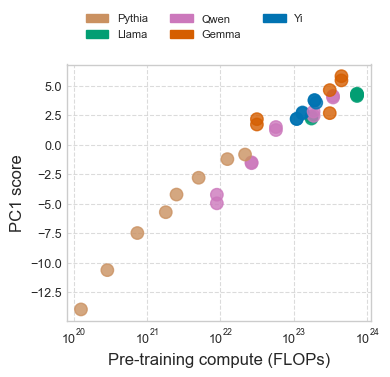

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig = plt.figure(figsize=(4, 3.5))  # Create the figure
ax = fig.add_subplot(111)  # First subplot


# Second subplot: Scatter plot of pre-training compute vs PC1 score
models = pc1.index.to_list()
models = [m for m in models if m in model2compute]
x = [compute_compute(m) for m in models]
y = pc1.loc[models]

colors2 = [family2color[m.split("/")[0]] for m in models]
ax.scatter(x, y, c=colors2, s=80, alpha=0.8)
ax.set_xlabel("Pre-training compute (FLOPs)", fontsize=12)
ax.set_ylabel("PC1 score", fontsize=12)
ax.set_xscale("log")
ax.grid(True, axis="both", linestyle="--", alpha=0.7, zorder=-10)
# ax.set_xlim(1e19-1e18, None)
# ax.set_xlim(1e21, None)
ax.tick_params(labelsize=9)

# Adding a custom legend
family_names = {
    # "openai-community": "GPT-2",
    "EleutherAI": "Pythia",
    "meta-llama": "Llama",
    "Qwen": "Qwen",
    "google": "Gemma",
    "01-ai": "Yi",
}
legend_handles = [
    mpatches.Patch(color=family2color[f], label=family_names[f]) for f in family_names
]
fig.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),  # Adjust as needed
    ncols=3,  # Set number of columns to split legend into two lines
    fontsize=8,
)


# Add a title to the entire figure
# fig.suptitle("PC1 score under train-before-test.", fontsize=14)
# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.05, 1, 1])
# Uncomment if you want to save the plot as a PDF
# plt.savefig("figures/combined_pca_plots.pdf", bbox_inches="tight", pad_inches=0.1, transparent=True)
plt.savefig(
    "figures/train_before_test_pca_1st_comp_scale.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)

# # Display the plot
# plt.show()'

## Qwen Case Study

### Direct-Eval

In [44]:
ret = []
qwen_models = [m for m in model_list if "qwen" in m.lower()]
for task_name in valid_tasks:
    mtc = task2metric(task_name)
    val = all_eval[task_name].loc[qwen_models].values.reshape(-1, 1)
    ret.append(val)

ret = np.concatenate(ret, axis=1).astype(np.float32)
display(ret.shape)

pca = PCA(n_components=5)
X = StandardScaler().fit_transform(ret)
X_pca = pca.fit_transform(X)


# output the variance of each component
explained_variance = pca.explained_variance_ratio_
display(explained_variance, explained_variance.sum())


(26, 24)

array([0.73662627, 0.09451292, 0.04508385, 0.03153441, 0.02828731],
      dtype=float32)

0.9360448

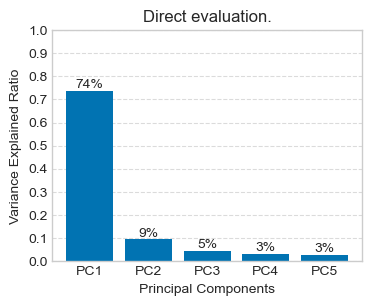

In [45]:
import numpy as np
import matplotlib.pyplot as plt

palette = sns.color_palette("colorblind", 10)
plt.figure(figsize=(4, 3))
bars = plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    align="center",
    color=palette[0],
)

plt.xlabel("Principal Components")
plt.ylabel("Variance Explained Ratio")
plt.ylim(0, 1)

# Create labels ["PC1", "PC2", ...]
pc_labels = [f"PC{i}" for i in range(1, len(explained_variance) + 1)]
plt.xticks(range(1, len(explained_variance) + 1), pc_labels)

plt.yticks(
    np.arange(0, 1.1, 0.1),
    [f"{i:.1f}" for i in np.arange(0, 1.1, 0.1)],
)
# plt.set_ylim(0, 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.7, zorder=-10)
plt.grid(False, axis="x")

# Adding text annotations above each bar
for bar, var in zip(bars, explained_variance):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        "%.0lf%%" % (100.0 * var),
        # "%.2lf" % (var),
        ha="center",
        va="bottom",
    )
plt.title("Direct evaluation.")

plt.savefig(
    "figures/direct_model_eval_pca_qwen_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

# Display the major components
# display(pca.components_)

### Train-before-Test

In [46]:
ret = []
qwen_models = [m for m in model_list if "qwen" in m.lower()]
for task_name in valid_tasks:
    mtc = task2metric(task_name)
    val = all_train[task_name].loc[qwen_models].values.reshape(-1, 1)
    if "test_bits_per_byte" in mtc:
        val2 = all_eval[task_name].loc[qwen_models].values.reshape(-1, 1)
        val = np.concatenate([val, val2], axis=1).min(axis=1).reshape(-1, 1)
    else:
        val2 = all_eval[task_name].loc[qwen_models].values.reshape(-1, 1)
        val = np.concatenate([val, val2], axis=1).max(axis=1).reshape(-1, 1)
    ret.append(val)

ret = np.concatenate(ret, axis=1).astype(np.float32)
display(ret.shape)

pca = PCA(n_components=5)
X = StandardScaler().fit_transform(ret)
X_pca = pca.fit_transform(X)


# output the variance of each component
explained_variance = pca.explained_variance_ratio_
display(explained_variance, explained_variance.sum())


(26, 24)

array([0.92797184, 0.02207378, 0.01306214, 0.00828271, 0.00683476],
      dtype=float32)

0.9782252

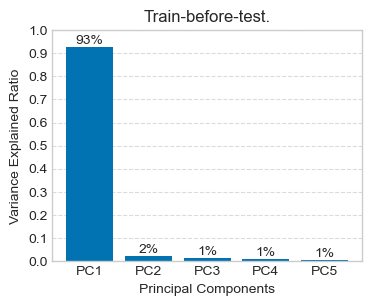

In [47]:
import numpy as np
import matplotlib.pyplot as plt

palette = sns.color_palette("colorblind", 10)
plt.figure(figsize=(4, 3))
bars = plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    align="center",
    color=palette[0],
)

plt.xlabel("Principal Components")
plt.ylabel("Variance Explained Ratio")
plt.ylim(0, 1)

# Create labels ["PC1", "PC2", ...]
pc_labels = [f"PC{i}" for i in range(1, len(explained_variance) + 1)]
plt.xticks(range(1, len(explained_variance) + 1), pc_labels)

plt.yticks(
    np.arange(0, 1.1, 0.1),
    [f"{i:.1f}" for i in np.arange(0, 1.1, 0.1)],
)
# plt.set_ylim(0, 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.7, zorder=-10)
plt.grid(False, axis="x")

# Adding text annotations above each bar
for bar, var in zip(bars, explained_variance):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        "%.0lf%%" % (100.0 * var),
        # "%.2lf" % (var),
        ha="center",
        va="bottom",
    )
plt.title("Train-before-test.")

plt.savefig(
    "figures/train_before_test_pca_qwen_large.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
    transparent=True,
)
plt.show()

# Display the major components
# display(pca.components_)

## Banner

In [48]:
task1 = "nq_open"
task2 = "arc_challenge"

In [49]:
import numpy as np
import seaborn as sns

palette = sns.color_palette("husl", 10)


def plot_bump_plot(rank1, rank2, minmaxrank1, minmaxrank2, ax, color_models=None):
    # bump plot using data1 and data2
    if color_models is None:
        color_models = {
            model: palette[i % len(palette)] for i, model in enumerate(rank1)
        }

    for model in rank1:
        position_left = rank1[model]
        position_right = rank2[model]

        xs = [0, 1]
        ys = [position_left, position_right]
        ax.plot(xs, ys, "-o", label=model, color=color_models[model])

        # all lines from left to right
        max_left = min(minmaxrank1[model])
        min_left = max(minmaxrank1[model])
        max_right = min(minmaxrank2[model])
        min_right = max(minmaxrank2[model])

        xs = np.linspace(0, 1, 20)
        ymin = np.linspace(min_left, min_right, 20)
        ymax = np.linspace(max_left, max_right, 20)
        ax.fill_between(xs, ymin, ymax, color=color_models[model], alpha=0.1)

    # Customize the plot
    # ax.set_xlim(-0.2, 2 - 0.8)
    ax.set_ylim(len(rank1) + 1, 0)  # Reverse y-axis to show rank 1 at top

    # Add labels (in all caps)
    # order_capitalized = [labels[x] for x in order]
    order_capitalized = [task_rename[task1], task_rename[task2]]

    # ax.set_xticks(list(range(len(order_capitalized))), order_capitalized)
    # set the xticks to be vertical
    ax.set_xticks(
        list(range(len(order_capitalized))), order_capitalized, rotation=0, fontsize=13
    )

    # Model name annotations to the left and right of the plot
    for i, model in enumerate(rank1):
        ax.text(
            -0.1,
            i + 1,
            model_rename[model],
            ha="right",
            va="center",
            color=color_models[model],
            weight="roman",
        )
        ax.text(
            1.1,
            i + 1,
            f"{i+1}",
            ha="left",
            va="center",
            color=color_models[model],
            weight="roman",
        )

    ax.set_yticks([])
    # if title:
    #     ax.set_title(title)

In [50]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import rankdata


def significant_better(score_a, stderr_a, score_b, stderr_b):
    diff = score_a - score_b
    se = np.sqrt(stderr_a**2 + stderr_b**2)
    z = np.abs(diff) / se if se > 0 else 0
    if diff > 0 and z > 1.96:
        return True, z
    return False, z


def build_partial_order(scores: pd.Series, stderrs: pd.Series):
    models = scores.index
    G = nx.DiGraph()
    G.add_nodes_from(models)
    edges = []
    for m1 in models:
        for m2 in models:
            if m1 == m2:
                continue
            sig, z = significant_better(
                scores[m1], stderrs[m1], scores[m2], stderrs[m2]
            )
            if sig:
                edges.append((m1, m2, z))
    for m1, m2, z in edges:
        G.add_edge(m1, m2, z=z)
    return G


def parallel_greedy_rank(models, G1, G2, score1, score2):
    vanilla_rank1 = rankdata(list(-score1.values))
    vanilla_rank2 = rankdata(list(-score2.values))
    vanilla_rank1 = {m: vanilla_rank1[i] for i, m in enumerate(score1.index)}
    vanilla_rank2 = {m: vanilla_rank2[i] for i, m in enumerate(score2.index)}

    G1 = G1.copy()
    G2 = G2.copy()
    available_1 = set([m for m in models if G1.in_degree(m) == 0])
    available_2 = set([m for m in models if G2.in_degree(m) == 0])
    order1, order2 = [], []
    n = len(models)
    for _ in range(n):
        rank1 = {m: i for i, m in enumerate(order1, start=1)}
        rank2 = {m: i for i, m in enumerate(order2, start=1)}

        # Find all available pairs
        pairs = []
        for m1 in available_1:
            for m2 in available_2:
                # prioritize those that are already placed in only one graph
                cost1 = rank2.get(m1, n + 1) + rank1.get(m2, n + 1)
                # if none of the models are placed, prefer matching models
                cost2 = int(m1 != m2)
                # otherwise, prefer the model with better performance in the other task
                cost3 = vanilla_rank2[m1] + vanilla_rank1[m2]
                cost = (cost1, cost2, cost3)
                pairs.append((cost, m1, m2))
        # Pick the pair with minimal cost (prefer matching models)
        pairs.sort()
        _, m1, m2 = pairs[0]
        order1.append(m1)
        order2.append(m2)
        # Remove m1 from g1 and update available_1
        G1.remove_node(m1)
        available_1 = set([m for m in models if G1.in_degree(m) == 0])
        # Remove m2 from G2 and update available_2
        G2.remove_node(m2)
        available_2 = set([m for m in models if G2.in_degree(m) == 0])
    return order1, order2


def rank_models(
    score1: pd.Series, stderr1: pd.Series, score2: pd.Series, stderr2: pd.Series
):
    assert all(score1.index == stderr1.index)
    assert all(score2.index == stderr2.index)
    assert set(score1.index) == set(score2.index)
    models = list(score1.index)
    G1 = build_partial_order(score1, stderr1)
    G2 = build_partial_order(score2, stderr2)
    order1, order2 = parallel_greedy_rank(models, G1, G2, score1, score2)
    rank1_series = {m: i + 1 for i, m in enumerate(order1)}
    rank2_series = {m: i + 1 for i, m in enumerate(order2)}
    return rank1_series, rank2_series

In [51]:
def get_minmaxrank(score, stderr):
    ret = {}
    for m1 in score.index:
        larger_than, smaller_than = 0, 0
        for m2 in score.index:
            if significant_better(
                score.loc[m1], stderr.loc[m1], score.loc[m2], stderr.loc[m2]
            )[0]:
                larger_than += 1
            elif significant_better(
                score.loc[m2], stderr.loc[m2], score.loc[m1], stderr.loc[m1]
            )[0]:
                smaller_than += 1
        ret[m1] = (smaller_than + 1, len(score) - larger_than)
    return ret

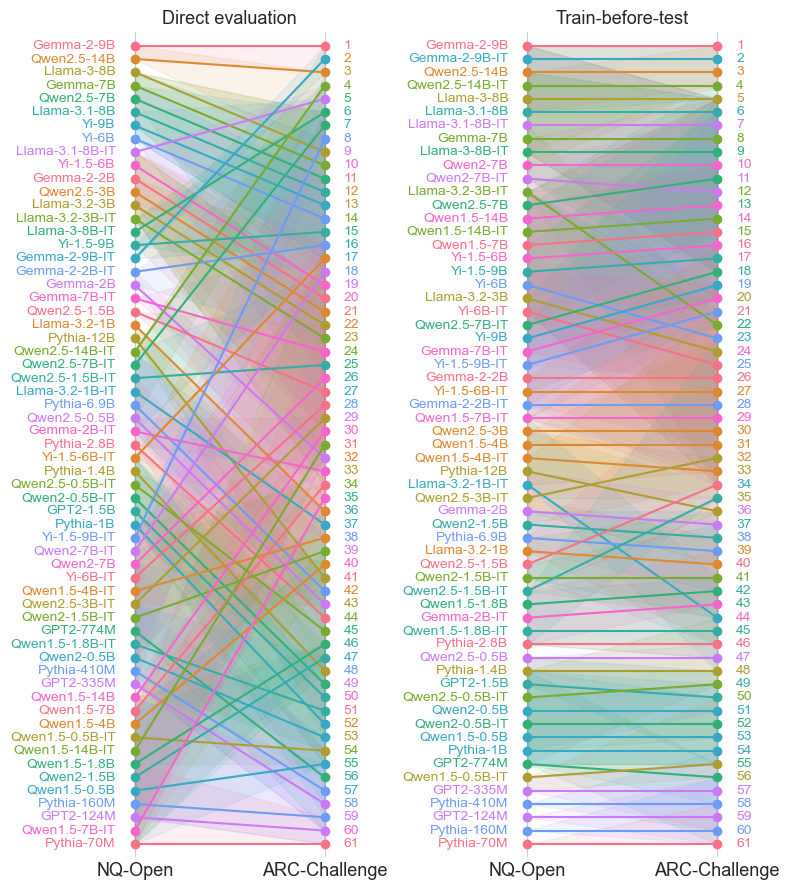

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(8, 9))


minmaxrankL = get_minmaxrank(
    all_eval[task1],
    all_eval_err[task1].loc[all_eval[task1].index],
)
minmaxrankR = get_minmaxrank(
    all_eval[task2].loc[all_eval[task1].index],
    all_eval_err[task2].loc[all_eval[task1].index],
)
rankL, rankR = rank_models(
    all_eval[task1],
    all_eval_err[task1].loc[all_eval[task1].index],
    all_eval[task2].loc[all_eval[task1].index],
    all_eval_err[task2].loc[all_eval[task1].index],
)
color_models = {model: palette[i % len(palette)] for i, model in enumerate(rankL)}
plot_bump_plot(
    rankL, rankR, minmaxrankL, minmaxrankR, axs[0], color_models=color_models
)

minmaxrankL = get_minmaxrank(
    all_train[task1],
    all_train_err[task1].loc[all_train[task1].index],
)
minmaxrankR = get_minmaxrank(
    all_train[task2].loc[all_train[task1].index],
    all_train_err[task2].loc[all_train[task1].index],
)
rankL, rankR = rank_models(
    all_train[task1],
    all_train_err[task1].loc[all_train[task1].index],
    all_train[task2].loc[all_train[task1].index],
    all_train_err[task2].loc[all_train[task1].index],
)
plot_bump_plot(
    rankL, rankR, minmaxrankL, minmaxrankR, axs[1], color_models=color_models
)

axs[0].set_title(f"Direct evaluation", fontsize=13)
axs[1].set_title(f"Train-before-test", fontsize=13)

for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.subplots_adjust(wspace=1.2)
plt.tight_layout()

plt.savefig("./figures/banner.pdf", bbox_inches="tight")

#### Unit Test

In [53]:
def is_different(mean1, mean2, err1, err2):
    # confidence test with 95% confidence
    return abs(mean1 - mean2) > 1.96 * np.sqrt(err1**2 + err2**2)


def is_better(mean1, mean2, err1, err2):
    # confidence test with 95% confidence
    return mean1 > mean2 + 1.96 * np.sqrt(err1**2 + err2**2)


minmaxrankL = get_minmaxrank(
    all_eval[task1],
    all_eval_err[task1].loc[all_eval[task1].index],
)
minmaxrankR = get_minmaxrank(
    all_eval[task2].loc[all_eval[task1].index],
    all_eval_err[task2].loc[all_eval[task1].index],
)
rankL, rankR = rank_models(
    all_eval[task1],
    all_eval_err[task1].loc[all_eval[task1].index],
    all_eval[task2].loc[all_eval[task1].index],
    all_eval_err[task2].loc[all_eval[task1].index],
)

rankL = sorted(rankL.items(), key=lambda x: x[1])
for i, (m1, r1) in enumerate(rankL):
    for j in range(i - 1):
        m2, r2 = rankL[j]
        score1 = all_eval[task1].loc[m1]
        score2 = all_eval[task1].loc[m2]
        err1 = all_eval_err[task1].loc[m1]
        err2 = all_eval_err[task1].loc[m2]
        if is_better(score1, score2, err1, err2) and is_different(
            score1, score2, err1, err2
        ):
            print(
                f"On task {task1}, {m1} is ranked lower than {m2} with significantly higher scores {score1:.5f} vs {score2:.5f}"
            )

rankR = sorted(rankR.items(), key=lambda x: x[1])
for i, (m1, r1) in enumerate(rankR):
    for j in range(i - 1):
        m2, r2 = rankR[j]
        score1 = all_eval[task2].loc[m1]
        score2 = all_eval[task2].loc[m2]
        err1 = all_eval_err[task2].loc[m1]
        err2 = all_eval_err[task2].loc[m2]
        if is_better(score1, score2, err1, err2):
            print(
                f"On task {task2}, {m1} is ranked lower than {m2} with significantly scores {score1:.5f} vs {score2:.5f}"
            )

In [54]:
minmaxrankL = get_minmaxrank(
    all_train[task1],
    all_train_err[task1].loc[all_train[task1].index],
)
minmaxrankR = get_minmaxrank(
    all_train[task2].loc[all_train[task1].index],
    all_train_err[task2].loc[all_train[task1].index],
)
rankL, rankR = rank_models(
    all_train[task1],
    all_train_err[task1].loc[all_train[task1].index],
    all_train[task2].loc[all_train[task1].index],
    all_train_err[task2].loc[all_train[task1].index],
)

rankL = sorted(rankL.items(), key=lambda x: x[1])
for i, (m1, r1) in enumerate(rankL):
    for j in range(i - 1):
        m2, r2 = rankL[j]
        score1 = all_train[task1].loc[m1]
        score2 = all_train[task1].loc[m2]
        err1 = all_train_err[task1].loc[m1]
        err2 = all_train_err[task1].loc[m2]
        if is_better(score1, score2, err1, err2) and is_different(score1, score2, err1, err2):
            print(f"On task {task1}, {m1} is ranked lower than {m2} with significantly higher scores {score1:.5f} vs {score2:.5f}")

rankR = sorted(rankR.items(), key=lambda x: x[1])
for i, (m1, r1) in enumerate(rankR):
    for j in range(i - 1):
        m2, r2 = rankR[j]
        score1 = all_train[task2].loc[m1]
        score2 = all_train[task2].loc[m2]
        err1 = all_train_err[task2].loc[m1]
        err2 = all_train_err[task2].loc[m2]
        if is_better(score1, score2, err1, err2):
            print(f"On task {task2}, {m1} is ranked lower than {m2} with significantly higher scores {score1:.5f} vs {score2:.5f}")